## . thw following data source was https://nwcc-apps.sc.egov.usda.gov/?stationTriplet=1067:CA:SNTL&element=snow%20history%20report&networkFilters=sntl&format=table and was run June 8, 2025

In [3]:
import requests
import pandas as pd
import io # Import the io module

# The URL to your raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/jeradmelgard/Snow_Kirkwood/HEAD/Kirkwood_Data_Per_NWCC%28NWCC_Carson_Pass_1067_CA_SNWTL%29.csv'

# Fetch the content of the file using requests
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Use io.StringIO to treat the string content as a file for pandas
    df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print(f"Failed to fetch data from URL. Status code: {response.status_code}")
    print(response.text) # Print response content for debugging

        Date  PREC (in)  Median PREC (in)  SNWD (in)  TAVG (degF)  WTEQ (in)  \
0   6/6/2024       31.0              35.6          0         57.7        0.0   
1   6/7/2024       31.0              35.6          0         56.7        0.0   
2   6/8/2024       31.0              35.6          0         55.0        0.0   
3   6/9/2024       31.0              35.6          0         52.5        0.0   
4  6/10/2024       31.0              35.6          0         56.1        0.0   

   Median WTEQ (in)  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  


In [ ]:
## (2015). Plotly Open Source Graphing Library (Version 5.22.0) [Computer software]. GitHub. https://github.com/plotly/plotly.py (Accessed May 21, 2025).https://plotly.com/python/filled-area-tile-maps/

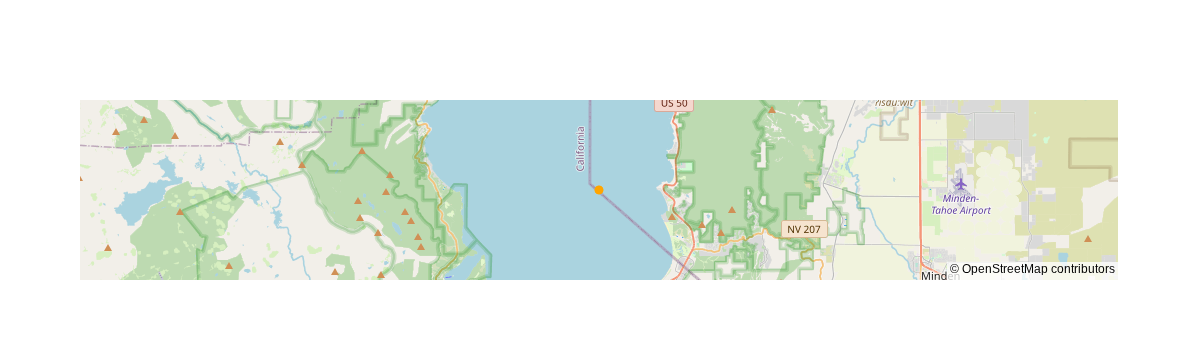

In [19]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermap(
    fill = "toself",
    lon = [-120], lat = [39],
    marker = { 'size': 10, 'color': "orange" }))

fig.update_layout(
    map = {
        'style': "open-street-map",
        'center': {'lon': -120, 'lat': 39 },
        'zoom': 10},
    showlegend = False)

fig.show()

##Google Gemini on 05/21/2025 was used to generate code. Additionally, some of the code was used from Plotly.com.  The code was modified and iterated a few times to produce the results.  The final prompt to gemini that was used was "the code does not show a map of Kirkwood. Show a map and also a way to hover over the map to illustrate the snowfall"

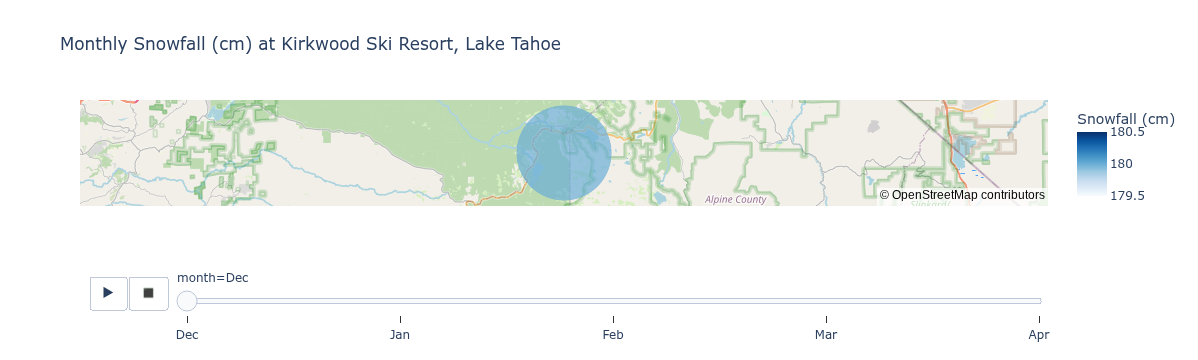

In [6]:
import plotly.express as px


# Kirkwood Ski Resort Coordinates (approximate)
KIRKWOOD_LAT = 38.6800
KIRKWOOD_LON = -120.0800

# Simulate monthly snowfall data for Kirkwood
months = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr'] # Typical ski season months
snowfall_cm = [
    180, # December snowfall (cm)
    250, # January snowfall (cm)
    220, # February snowfall (cm)
    150, # March snowfall (cm)
    80   # April snowfall (cm)
]

# Create DataFrame for Kirkwood snowfall
data_kirkwood = {
    'resort': ['Kirkwood'] * len(months),
    'latitude': [KIRKWOOD_LAT] * len(months),
    'longitude': [KIRKWOOD_LON] * len(months),
    'month': months,
    'snowfall_cm': snowfall_cm
}
df_kirkwood = pd.DataFrame(data_kirkwood)

# Create the scatter map
fig = px.scatter_map(
    df_kirkwood,
    lat="latitude",
    lon="longitude",
    color="snowfall_cm", # Color the point by snowfall
    size="snowfall_cm",  # Size the point by snowfall (optional, but good visual)
    hover_name="resort",
    hover_data={
        "snowfall_cm": ":.1f cm", # Format snowfall to one decimal place with 'cm'
        "month": True,           # Show month as is
        "latitude": False,       # Don't show lat/lon in hover if not needed
        "longitude": False
    },
    color_continuous_scale=px.colors.sequential.Blues, # Good colormap for snow
    size_max=80, # Max size of the marker, adjusted for better visibility
    zoom=9, # Zoom level to clearly see Lake Tahoe and surrounding mountains
    map_style="open-street-map", # <--- CHANGED THIS: Very reliable free map style
    title="Monthly Snowfall (cm) at Kirkwood Ski Resort, Lake Tahoe",
    animation_frame="month", # Animate over months
    labels={"snowfall_cm": "Snowfall (cm)"} # Custom label for the color bar/hover
)

# Update layout for better focus on a single point over time
fig.update_layout(
    geo=dict(
        center=dict(lat=KIRKWOOD_LAT, lon=KIRKWOOD_LON),
        scope='usa',
    )
)

fig.show()

In [7]:
df.describe()

,Date,PREC (in),Median PREC (in),SNWD (in),TAVG (degF),WTEQ (in),Median WTEQ (in),SNWD_cm,latitude,longitude
count,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.00,366.00
mean,2024-12-05 11:59:59.999999744,20.383060,24.643989,20.109290,42.265847,7.472131,8.903825,51.077596,38.68,-120.08
min,2024-06-06 00:00:00,0.000000,0.000000,0.000000,15.600000,0.000000,0.000000,0.000000,38.68,-120.08
25%,2024-09-05 06:00:00,11.000000,14.100000,0.000000,31.500000,0.000000,0.000000,0.000000,38.68,-120.08
50%,2024-12-05 12:00:00,26.600000,31.200000,4.000000,40.600000,0.850000,1.850000,10.160000,38.68,-120.08
75%,2025-03-06 18:00:00,31.100000,35.800000,35.000000,54.450000,12.775000,20.100000,88.900000,38.68,-120.08
max,2025-06-06 00:00:00,32.600000,36.800000,80.000000,68.200000,28.100000,29.500000,203.200000,38.68,-120.08
std,NaN,11.440859,12.861667,24.048332,13.023650,9.412684,10.810593,61.082763,0.00,0.00


In [ ]:
#The Following Scatter Plot was taken from plotly.com/python and motified using google Gemini on June 8 2025.

In [11]:
import plotly.graph_objects as go
import numpy as np # Keep numpy if you plan to use it elsewhere, but it's not strictly needed for this specific plot

# --- Assume df is already loaded here ---
# If your df is not loaded, you'll need the code from our previous conversation
# to load it from your GitHub URL. For example:

# import requests
# import io
# url = 'https://raw.githubusercontent.com/jeradmelgard/Snow_Kirkwood/HEAD/Kirkwood_Data_Per_NWCC%28NWCC_Carson_Pass_1067_CA_SNWTL%29.csv'
# response = requests.get(url)
#
# if response.status_code == 200:
#     df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
# else:
#     print(f"Failed to load data. Status code: {response.status_code}")
#     exit() # Exit if data can't be loaded

# Ensure 'SNWD (in)' is numeric and 'Date' is datetime
# It's good practice to ensure your data types are correct for plotting.
df['SNWD (in)'] = pd.to_numeric(df['SNWD (in)'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where essential data is missing after conversion
df.dropna(subset=['SNWD (in)', 'Date'], inplace=True)


# Correctly access DataFrame columns
# Use square brackets for column access, especially for names with spaces or special characters.
x_data = df['SNWD (in)']
y_data = df['Date']

# Initialize FigureWidget for interactivity in Jupyter/Colab
f = go.FigureWidget([go.Scatter(x=x_data, y=y_data, mode='markers')])

scatter = f.data[0]
# Ensure colors and sizes match the number of data points in your df
num_points = len(df)
colors = ['#a3a7e4'] * num_points # Default color for all points
scatter.marker.color = colors
scatter.marker.size = [10] * num_points # Default size for all points
f.layout.hovermode = 'closest'

# create our callback function
def update_point(trace, points, selector):
    # Only update if points are actually selected/clicked
    if points.point_inds:
        c = list(scatter.marker.color)
        s = list(scatter.marker.size)
        for i in points.point_inds:
            # Change color and size for the clicked point
            c[i] = '#bae2be' # Highlight color
            s[i] = 20      # Larger size
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s

# Assign the callback function to the scatter plot's click event
scatter.on_click(update_point)

# Display the figure
f # In Jupyter/Colab, simply calling the FigureWidget object displays it

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'size': [10, 10, 10, ..., 10, 10, 10]},
              'mode': 'markers',
              'type': 'scatter',
              'uid': 'f974cbc1-5604-49fa-8aae-2537d6f1fa01',
              'x': array([36, 35, 35, ..., 17, 18, 18]),
              'y': array([datetime.datetime(2025, 1, 6, 0, 0),
                          datetime.datetime(2025, 1, 7, 0, 0),
                          datetime.datetime(2025, 1, 31, 0, 0), ...,
                          datetime.datetime(2024, 12, 8, 0, 0),
                          datetime.datetime(2024, 12, 6, 0, 0),
                          datetime.datetime(2024, 12, 5, 0, 0)], dtype=object)}],
    'layout': {'hovermode': 'closest', 'template': '...'}
})

In [ ]:
## The below code is taken from plotly.com/python and modified using google Gemini June 8, 2011

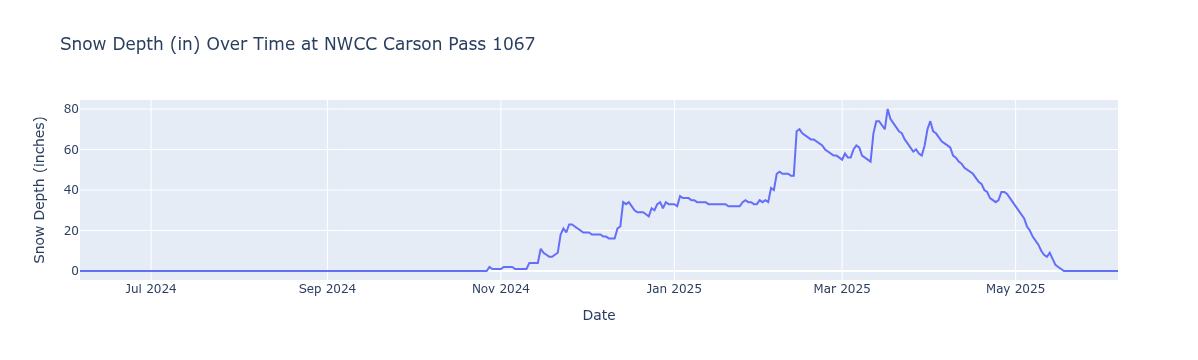

In [22]:
import pandas as pd
import plotly.express as px
import requests
import io

# --- 1. Load Your Data (from our previous conversation) ---
# This part ensures your DataFrame 'df' is correctly loaded.
csv_url = 'https://raw.githubusercontent.com/jeradmelgard/Snow_Kirkwood/HEAD/Kirkwood_Data_Per_NWCC%28NWCC_Carson_Pass_1067_CA_SNWTL%29.csv'
response = requests.get(csv_url)

if response.status_code == 200:
    df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
    # Ensure SNWD (in) is numeric and Date is a datetime object
    df['SNWD (in)'] = pd.to_numeric(df['SNWD (in)'], errors='coerce')
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Drop any rows where these critical values might be missing after conversion
    df.dropna(subset=['SNWD (in)', 'Date'], inplace=True)
else:
    print(f"Failed to load data from URL. Status code: {response.status_code}")
    # Handle the error, perhaps by exiting or loading dummy data
    df = pd.DataFrame({'Date': [], 'SNWD (in)': []}) # Create an empty df if loading fails

# --- 2. Create the Appropriate Plot ---
# Use Plotly Express for a simple and effective line plot
fig = px.line(
    df,
    x='Date',
    y='SNWD (in)',
    title='Snow Depth (in) Over Time at NWCC Carson Pass 1067'
)

# You can add customization if you like
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Snow Depth (inches)')

# --- 3. Display the Plot ---
fig.show()